In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

Using TensorFlow backend.


In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training
test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, 1 , T ,1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 1, 5, 1) Y.Shape: (185,)


In [8]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 1, 5, 1) x_test.shape: (37, 1, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [9]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=5, kernel_size=1, activation='relu'), input_shape=(None, 5, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(44, activation='selu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
r = model.fit(x_train.reshape(148, 1, 5, 1), y_train, epochs=500, validation_data=(x_test.reshape(37, 1, 5, 1), y_test))

Train on 148 samples, validate on 37 samples
Epoch 1/500
148/148 [==============================] - 1s 5ms/step - loss: 0.7740 - val_loss: 1.3152
Epoch 2/500
148/148 [==============================] - 0s 162us/step - loss: 0.6426 - val_loss: 1.2297
Epoch 3/500
148/148 [==============================] - 0s 168us/step - loss: 0.5352 - val_loss: 1.1457
Epoch 4/500
148/148 [==============================] - 0s 121us/step - loss: 0.4353 - val_loss: 1.0603
Epoch 5/500
148/148 [==============================] - 0s 176us/step - loss: 0.3481 - val_loss: 0.9615
Epoch 6/500
148/148 [==============================] - 0s 155us/step - loss: 0.2704 - val_loss: 0.8498
Epoch 7/500
148/148 [==============================] - 0s 142us/step - loss: 0.2096 - val_loss: 0.7341
Epoch 8/500
148/148 [==============================] - 0s 148us/step - loss: 0.1556 - val_loss: 0.6100
Epoch 9/500
148/148 [==============================] - 0s 135us/step - loss: 0.1118 - val_loss: 0.4818
Epoch 10/500
148/148 [========

Epoch 490/500
148/148 [==============================] - 0s 135us/step - loss: 1.5925e-07 - val_loss: 3.0839e-06
Epoch 491/500
148/148 [==============================] - 0s 155us/step - loss: 1.5670e-07 - val_loss: 2.9504e-06
Epoch 492/500
148/148 [==============================] - 0s 142us/step - loss: 1.5674e-07 - val_loss: 2.9752e-06
Epoch 493/500
148/148 [==============================] - 0s 138us/step - loss: 1.5453e-07 - val_loss: 3.0038e-06
Epoch 494/500
148/148 [==============================] - 0s 175us/step - loss: 1.5613e-07 - val_loss: 2.8959e-06
Epoch 495/500
148/148 [==============================] - 0s 155us/step - loss: 1.5385e-07 - val_loss: 2.8871e-06
Epoch 496/500
148/148 [==============================] - 0s 195us/step - loss: 1.5176e-07 - val_loss: 2.9918e-06
Epoch 497/500
148/148 [==============================] - 0s 152us/step - loss: 1.5088e-07 - val_loss: 2.9075e-06
Epoch 498/500
148/148 [==============================] - 0s 168us/step - loss: 1.4912e-07 - val_

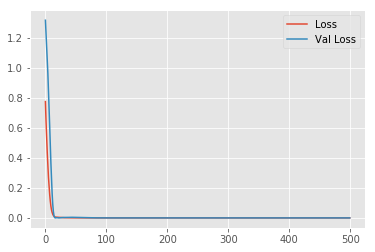

In [11]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [12]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,1, 5,1))

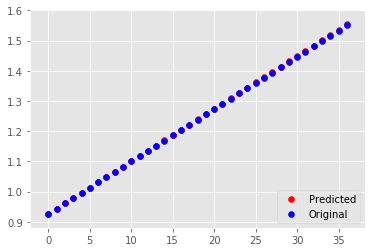

In [13]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

In [14]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.00653, 154.00797, 155.0096 , 156.01138, 157.01337, 158.01552,
       159.01788, 160.02045, 161.0232 , 162.02618, 163.02937, 164.03278,
       165.0364 , 166.04028, 167.04437, 168.04872, 169.05331, 170.05814,
       171.06323, 172.06857, 173.07416, 174.08002, 175.08615, 176.09253,
       177.0992 , 178.10614, 179.11334, 180.12082, 181.1286 , 182.13666,
       183.14499, 184.15361, 185.16254, 186.17172, 187.18121, 188.19101,
       189.20111], dtype=float32)

In [15]:
# adjusting predicited y_test values by rounding 

np.round(scaler.inverse_transform(result).flatten())

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [16]:
scaler.inverse_transform(y_test).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

In [17]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, 1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)


X_test.Shape: (10, 1, 5, 1) Y_test.Shape: (10,)


In [18]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [19]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [20]:
# look into original y_test values

scaler.inverse_transform(Y_test).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])